in this file, i will use house pricing dataset to train a model for price preditction of houses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1632300362534233.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.describe()


,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
print(df.dtypes)  # Shows the data type of each column

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [5]:
# convert area value types to numeric
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [6]:
print(df.isnull().sum())  # Shows the number of missing values per column

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [7]:

rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60.0,2,True,True,True,NaN,2.650000e+09,88333.33
570,NaN,2,True,True,True,Ostad Moein,3.310000e+09,110333.33
662,85.0,2,True,True,True,NaN,1.955000e+09,65166.67
706,117.0,2,True,True,True,NaN,6.500000e+09,216666.67
709,NaN,3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,NaN,2,True,True,False,Damavand,7.000000e+09,233333.33
1108,77.0,2,True,True,False,NaN,2.020000e+09,67333.33
1109,71.0,1,True,True,True,NaN,2.300000e+09,76666.67
1577,100.0,2,True,True,True,NaN,3.100000e+09,103333.33
1604,NaN,2,True,True,True,Gheitarieh,8.700000e+09,290000.00


In [8]:
# cleaning the data by dropping rows with missing values and checking the result
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())  # Shows the number of missing values per column

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


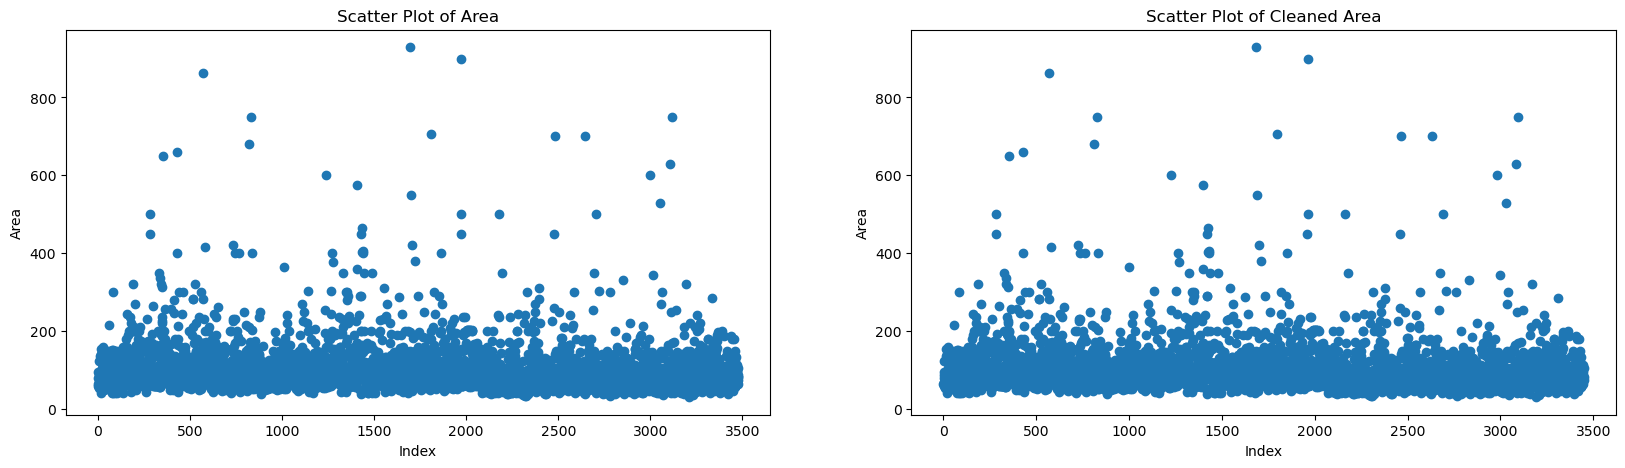

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].scatter(range(len(df['Area'])), df['Area'])
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Area')
ax[0].set_title('Scatter Plot of Area')

ax[1].scatter(range(len(df_cleaned['Area'])), df_cleaned['Area'])
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Area')
ax[1].set_title('Scatter Plot of Cleaned Area')

plt.show()

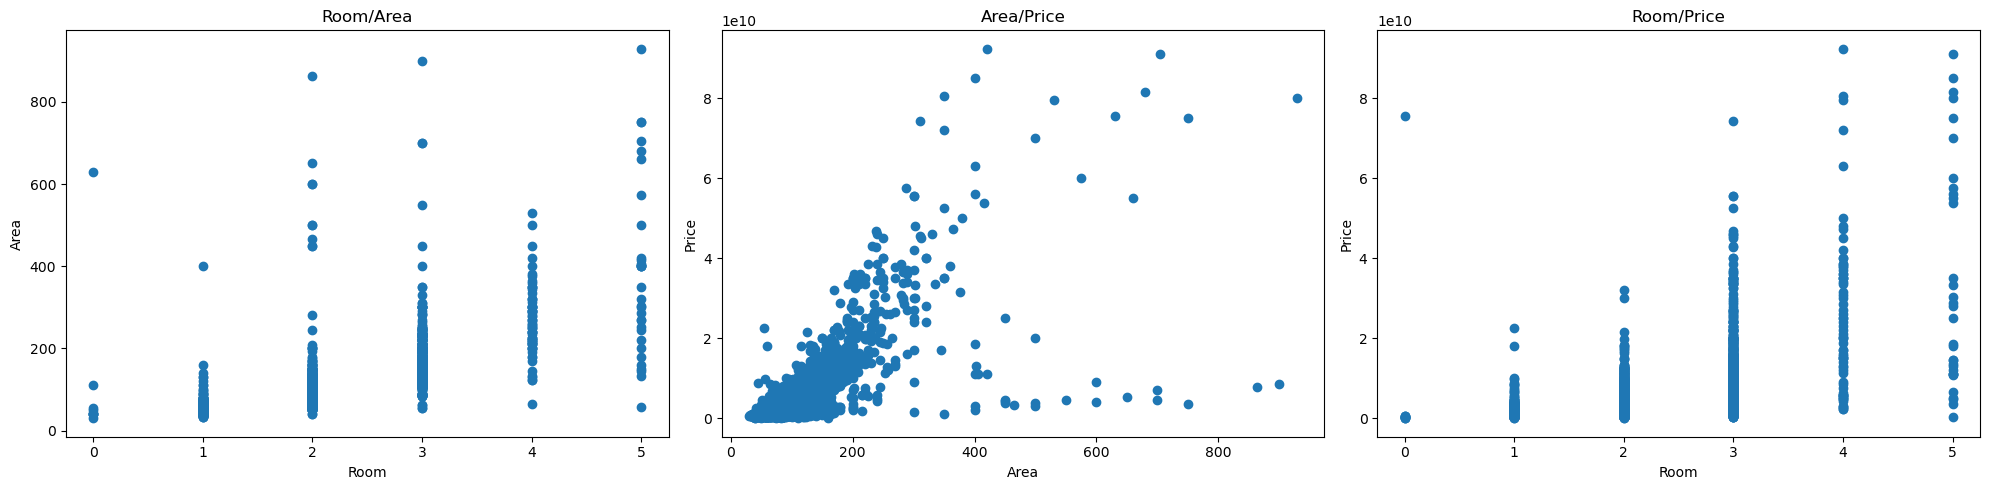

In [10]:

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].scatter(df_cleaned['Room'], df_cleaned['Area'])
ax[0].set_xlabel('Room')
ax[0].set_ylabel('Area')
ax[0].set_title('Room/Area')
# ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1].scatter(df_cleaned['Area'], df_cleaned['Price'])
ax[1].set_title('Area/Price')
ax[1].set_xlabel('Area')
ax[1].set_ylabel('Price')
# ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[2].scatter(df_cleaned['Room'], df_cleaned['Price'])
ax[2].set_title('Room/Price')
ax[2].set_xlabel('Room')
ax[2].set_ylabel('Price')
# ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()

plt.show()

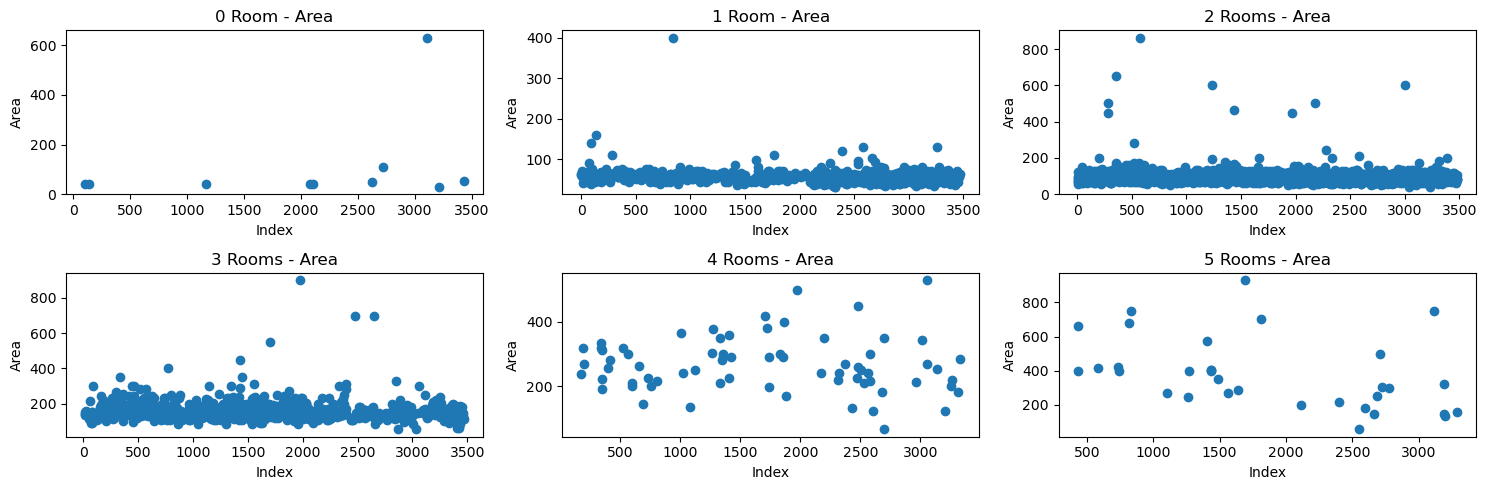

In [11]:
df_room_0 = df[df['Room'] == 0]
df_room_1 = df[df['Room'] == 1]
df_room_2 = df[df['Room'] == 2]
df_room_3 = df[df['Room'] == 3]
df_room_4 = df[df['Room'] == 4]
df_room_5 = df[df['Room'] == 5]

fig, ax = plt.subplots(2,3, figsize=(15,5))
ax[0,0].scatter(df_room_0.index, df_room_0['Area'])
ax[0,0].set_xlabel('Index')
ax[0,0].set_ylabel('Area')
ax[0,0].set_title('0 Room - Area')
ax[0,1].scatter(df_room_1.index, df_room_1['Area'])
ax[0,1].set_xlabel('Index')
ax[0,1].set_ylabel('Area')
ax[0,1].set_title('1 Room - Area')
ax[0,2].scatter(df_room_2.index, df_room_2['Area'])
ax[0,2].set_xlabel('Index')
ax[0,2].set_ylabel('Area')
ax[0,2].set_title('2 Rooms - Area')
ax[1,0].scatter(df_room_3.index, df_room_3['Area'])
ax[1,0].set_xlabel('Index')
ax[1,0].set_ylabel('Area')
ax[1,0].set_title('3 Rooms - Area')
ax[1,1].scatter(df_room_4.index, df_room_4['Area'])
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Area')
ax[1,1].set_title('4 Rooms - Area')
ax[1,2].scatter(df_room_5.index, df_room_5['Area'])
ax[1,2].set_xlabel('Index')
ax[1,2].set_ylabel('Area')
ax[1,2].set_title('5 Rooms - Area')    
plt.tight_layout()
plt.show()

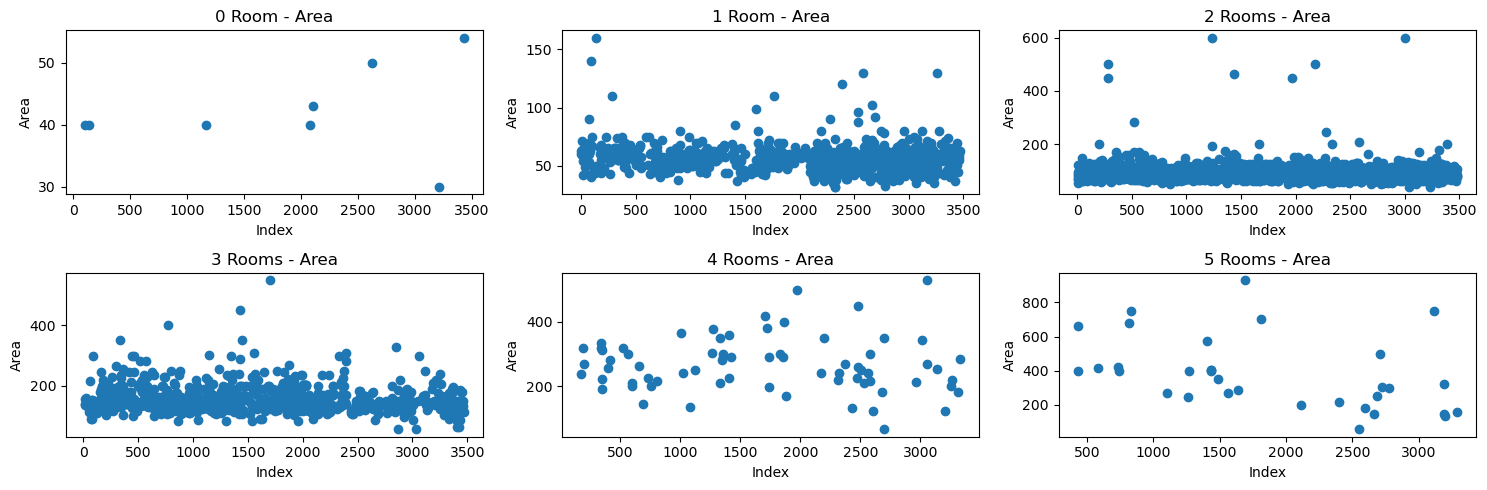

In [25]:
# remove data manually based on plots

df = df[~((df['Room'] == 0) & (df['Area'] > 100))]
df = df[~((df['Room'] == 1) & (df['Area'] > 300))]
df = df[~((df['Room'] == 2) & (df['Area'] > 600))]
df = df[~((df['Room'] == 3) & (df['Area'] > 600))]

# Select data where Room == 0 AFTER filtering
df_room_0 = df[df['Room'] == 0]
df_room_1 = df[df['Room'] == 1]
df_room_2 = df[df['Room'] == 2]
df_room_3 = df[df['Room'] == 3]
df_room_4 = df[df['Room'] == 4]
df_room_5 = df[df['Room'] == 5]

fig, ax = plt.subplots(2,3, figsize=(15,5))
ax[0,0].scatter(df_room_0.index, df_room_0['Area'])
ax[0,0].set_xlabel('Index')
ax[0,0].set_ylabel('Area')
ax[0,0].set_title('0 Room - Area')
ax[0,1].scatter(df_room_1.index, df_room_1['Area'])
ax[0,1].set_xlabel('Index')
ax[0,1].set_ylabel('Area')
ax[0,1].set_title('1 Room - Area')
ax[0,2].scatter(df_room_2.index, df_room_2['Area'])
ax[0,2].set_xlabel('Index')
ax[0,2].set_ylabel('Area')
ax[0,2].set_title('2 Rooms - Area')
ax[1,0].scatter(df_room_3.index, df_room_3['Area'])
ax[1,0].set_xlabel('Index')
ax[1,0].set_ylabel('Area')
ax[1,0].set_title('3 Rooms - Area')
ax[1,1].scatter(df_room_4.index, df_room_4['Area'])
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Area')
ax[1,1].set_title('4 Rooms - Area')
ax[1,2].scatter(df_room_5.index, df_room_5['Area'])
ax[1,2].set_xlabel('Index')
ax[1,2].set_ylabel('Area')
ax[1,2].set_title('5 Rooms - Area')    
plt.tight_layout()
plt.show()

In [20]:
df[(df['Room'] < 2) & (df['Area'] > 200)]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
839,400.0,1,True,False,False,Shahedshahr,3.000000e+09,100000.0


In [13]:
address = df['Address'].unique()
len(address)

193

In [17]:
# calculate mean and mse of area for each room number

mean_area_by_room = df.groupby('Room')['Area'].mean()

print("Mean Area by Room:\n", mean_area_by_room)

mse_area_by_room = df.groupby('Room')['Area'].apply(lambda x: np.mean((x - x.mean())**2))
print("MSE Area by Room:\n", mse_area_by_room)

Mean Area by Room:
 Room
0    107.700000
1     57.228826
2     93.026585
3    161.376197
4    266.785714
5    382.878788
Name: Area, dtype: float64
MSE Area by Room:
 Room
0    30757.210000
1      331.070967
2     1545.383751
3     3727.575302
4     7269.939796
5    42721.742883
Name: Area, dtype: float64
